<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/KNN_and_SVM_On_Wholesale_Customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as ad
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=ad.read_csv("/content/Wholesale customers data.csv")

In [ ]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


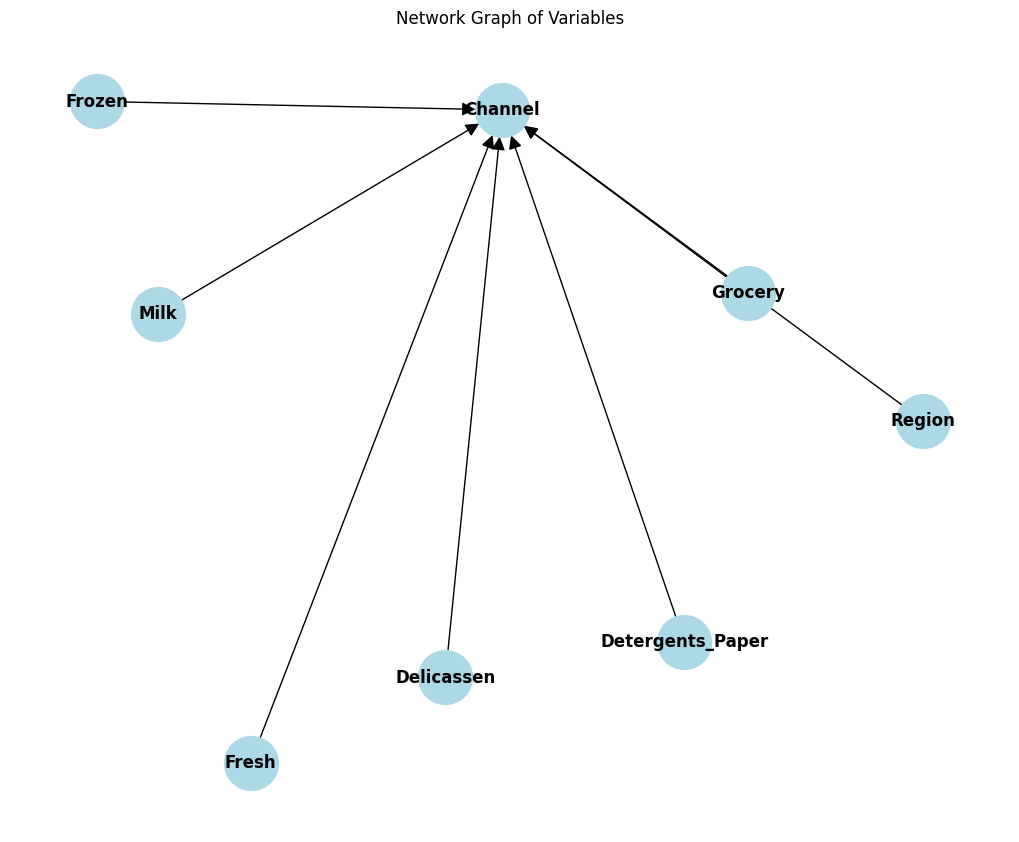

In [ ]:
G = nx.DiGraph()
for column in df.columns:
    G.add_node(column)
target_variable = 'Channel'  # Assuming 'Channel' is the target variable
for column in df.columns:
    if column != target_variable:
        G.add_edge(column, target_variable)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_weight='bold', arrowsize=20)
plt.title('Network Graph of Variables')
plt.show()

The graph appears to show relationships between different categories of products that might be found in a grocery store. The nodes in the graph represent the product categories, and the edges represent the relationships between them. For example, there is an edge between the nodes "Milk" and "Grocery," which indicates that milk is a type of grocery product. Similarly, there is an edge between the nodes "Frozen" and "Delicassen," which indicates that frozen foods can be found in the delicassen section of a grocery store. Overall, the network graph provides a way to visualize the relationships between different product categories.

In [ ]:
X = df[['Fresh', 'Milk','Grocery','Delicassen','Frozen']]
y = df['Channel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8977272727272727
KNN Confusion Matrix:
 [[59  6]
 [ 3 20]]
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.91      0.93        65
           2       0.77      0.87      0.82        23

    accuracy                           0.90        88
   macro avg       0.86      0.89      0.87        88
weighted avg       0.90      0.90      0.90        88



In [ ]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8863636363636364
SVM Confusion Matrix:
 [[58  7]
 [ 3 20]]
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.89      0.92        65
           2       0.74      0.87      0.80        23

    accuracy                           0.89        88
   macro avg       0.85      0.88      0.86        88
weighted avg       0.90      0.89      0.89        88



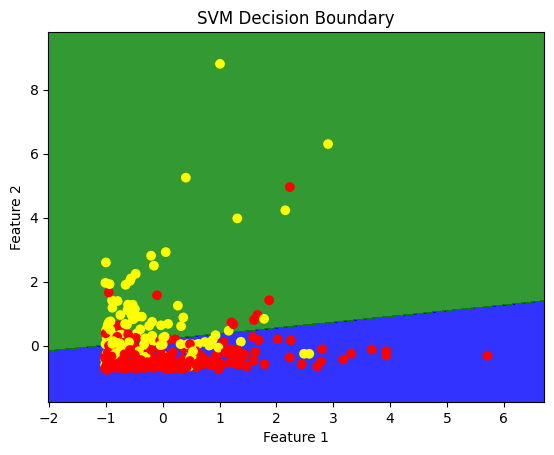

In [ ]:
from matplotlib.colors import ListedColormap

# Create a mesh grid to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('blue', 'green')))

# Plot data points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=ListedColormap(('red', 'yellow')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()
